## Lab 12: Radioactive Decay, Keplerian Orbits, and Runge-Kutta Method

1.) Calculate how fast the unstable isotope carbon-14 decays: dc/dt = -kc(t). Use t = 0 and c = 1 as initial conditions and a decay constant of k = 0.00012097/year. Write your own 10 lines of python code to solve this equation using the discretized form: c(t+ delta(t)) = c(t)[1-k(deltat)]. Use a step size of 10 years. At the end, make a plot that compares your numerical solution to the analytical solution, c(t) = c(0)e^-kt. What is the half life of carbon 14? (time it takes for half to decay)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
#the numerical solution, dc/dt = -kc(t)
t = 0
c = 1
k = 0.00012097 #per year
stepsize = 10 #years
halflife = 1/2

c_numerical = []
time_numerical = []

while True:
    c_new = c*(1-(k*stepsize))
    c = c_new
    t += stepsize
    c_numerical.append(c)
    time_numerical.append(t)
    
    if c <= 0.001:
        break

In [113]:
t = 0
c = 1
k = 0.00012097 #per year
stepsize = 10 #years
halflife = 1/2

while True:
    c_new = c*(1-(k*stepsize))
    c = c_new
    t += stepsize
    
    if c <= halflife:
        numerical_solution = t
        print('numerical halflife = ',c, ',', numerical_solution, 'years')
        break


numerical halflife =  0.4997847890588312 , 5730 years


In [114]:
#the analytical solution, c(t) = c(0)e^-kt
t = 0
c0 = 1
k = 0.00012097 #per year
stepsize = 10 #years
halflife = 1/2

c_analytical = []
time_analytical = []

while True:
    c_new = c0*np.e**(-k*t)
    c = c_new
    t += stepsize
    c_analytical.append(c)
    time_analytical.append(t)
    
    if c <= 0.001:
        break


In [115]:
t = 0
c0 = 1
k = 0.00012097 #per year
stepsize = 10 #years
halflife = 1/2


while True:
    c_new = c0*np.e**(-k*t)
    c = c_new
    t += stepsize

    if c <= halflife:
        analytical_solution = t
        print('analytical halflife = ',c, ',', analytical_solution, 'years')
        break

analytical halflife =  0.49999454030978113 , 5740 years


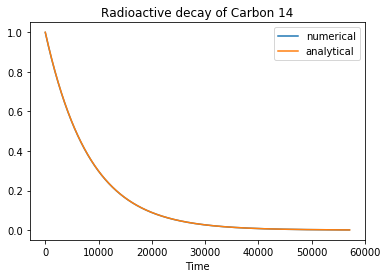

In [118]:
plt.plot(time_numerical, c_numerical, label = 'numerical')
plt.plot(time_analytical, c_analytical, label = 'analytical')
plt.title('Radioactive decay of Carbon 14')
plt.xlabel('Time')
plt.legend()
plt.show()

In [123]:
print('half life of carbon 14 is about ', (analytical_solution+numerical_solution)/2, 'years')

half life of carbon 14 is about  5735.0 years


2.) Now we want to use the same method to solve Newton's equation for a planet orbiting the sun. Assume that the sun has mass m = 10^6 and remains stationary for simplicity. Instead of a single variable c(t), we now have four variables that change with time, r = (x,y), v = (vx,vy)

dvx/dt = -Gm/r^3 x

dvy/dt = -Gm/r^3 y

dx/dt = vx

dy/dt = vy

For simplicity set G = 3x10^-6, delta(t) = 10^-3 and integrate for 10 time units. As initial conditions, we recommend x = 1, y = 0, vx = 0, vy = 2

In [265]:
m = 10**6
G = 3*10**-6
delta_t = 10**-3
time = 10 #timeunits

xt = []
yt = []

x = 1
y = 0
vx = 0
vy = 2
t= 0

r = x**2 + y**2
v = vx**2 + vy**2
print('r = ', r, ',', 'v = ', v)

#dc/dt = -kc(t) --> c(t+ delta(t)) = c(t)[1-k(deltat)] --> c_new = c*(1-(k*stepsize))
for i in range(10):
    
    x += vx *delta_t
    y += vy *delta_t
    
    r = np.sqrt(x**2 + y**2)
    
    vx = x * (-G*m/(r**3)) * delta_t
    vy = y * (-G*m/(r**3)) * delta_t
    
    x = x + vx *d
    
    xt.append(x)
    yt.append(y)
    
    print(x, y)
    
    
    t += delta_t
    

r =  1 , v =  4
0.0 0.002
-0.0 -0.75
0.0 5.333333333333334e-06
-0.0 -105468.74999999999
0.0 2.696954732510289e-16
-0.0 -4.124525003135201e+25
0.0 1.7634915108238516e-57
-0.0 -9.64660526975832e+107
0.0 0.0
nan nan


/Users/CEE/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
/Users/CEE/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
/Users/CEE/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars
/Users/CEE/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/Users/CEE/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
/Users/CEE/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


Make a x-y plot with the following commands:

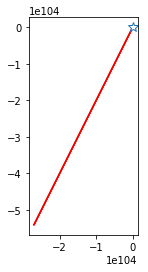

In [262]:
plt.plot(xt, yt,'r-')
plt.plot(0,0,'*',mfc='w',ms=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()